# **Trying to find the best HyperParamters**

In [10]:
from Q_learning import Q_Learning
import numpy as np
import matplotlib.pyplot as plt

In [2]:
q_learning = Q_Learning()
q_learning.max_episodes = 10000
q_learning.rewards={'r_time':-0.5,'r_pond':-5,'r_croissant':30,'r_cogs':20,'r_work':20}
q_learning.tubes=[[(0, 0), (1, 5)], [(1, 2), (4, 1)]]
q_learning.epsilon_decays={'epsilon_threshold': 0.5, 'epsilon_decay1': 0.9999, 'epsilon_decay2': 0.999}

In [12]:
alpha_list = [0.9, 0.6, 0.3, 0.1]
gamma_list = [0.9, 0.7, 0.5, 0.2]
R_alpha_list = []
R_gamma_list = []
colors= ['r', 'b', 'g', 'y', 'c']

In [7]:
%%time
for alpha in alpha_list:
    a_hist, Q_hist, Rtot = q_learning.learn(alpha,0.9,0.9)
    #print(Rtot)
    R_alpha_list.append(Rtot)

CPU times: user 2min 43s, sys: 5.76 s, total: 2min 48s
Wall time: 2min 40s


In [8]:
%%time
for gamma in gamma_list:
    a_hist, Q_hist, Rtot = q_learning.learn(0.9,gamma,0.9)
    #print(Rtot)
    R_gamma_list.append(Rtot)

CPU times: user 2min 53s, sys: 6.38 s, total: 2min 59s
Wall time: 2min 52s


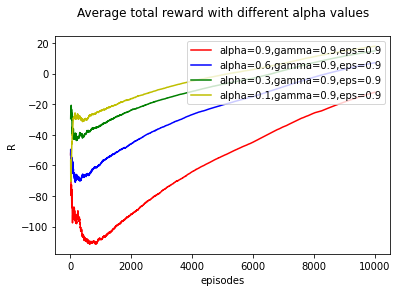

In [13]:
for i in range(len(alpha_list)):
    Rtot = R_alpha_list[i]
    Rtot_avg = Rtot.cumsum() / np.arange(1, len(Rtot) + 1)
    plt.plot(np.arange(20, len(Rtot_avg)), Rtot_avg[20:], colors[i], label=f'alpha={alpha_list[i]},gamma=0.9,eps=0.9')
    plt.legend(loc="upper right")
    
plt.xlabel('episodes')
plt.ylabel('R')
plt.title('Average total reward with different alpha values', fontsize=12, pad=20)
plt.show()

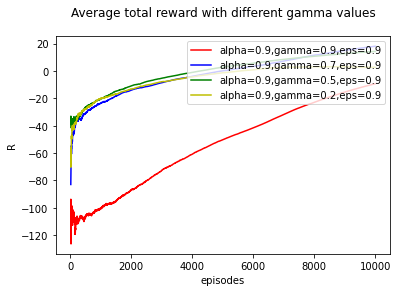

In [14]:
for i in range(len(gamma_list)):
    Rtot = R_gamma_list[i]
    Rtot_avg = Rtot.cumsum() / np.arange(1, len(Rtot) + 1)
    plt.plot(np.arange(20, len(Rtot_avg)), Rtot_avg[20:], colors[i], label=f'alpha=0.9,gamma={gamma_list[i]},eps=0.9')
    plt.legend(loc="upper right")


plt.xlabel('episodes')
plt.ylabel('R')    
plt.title('Average total reward with different gamma values', fontsize=12, pad=20)
plt.show()